## **Introduction About the Data :**
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

**id :** unique identifier of each diamond

**carat :** Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

**cut :** Quality of Diamond Cut

**color :** Color of Diamond

**clarity :** Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

**depth :** The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

**table :** A diamond's table is the facet which can be seen when the stone is viewed face up.

**x :** Diamond X dimension

**y :** Diamond Y dimension

**x :** Diamond Z dimension

### **Target variable:**

**price:** Price of the given Diamond.

In [224]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## **Import necessary Libraries**

In [48]:
!pip install xgboost

  Using cached xgboost-3.0.4-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.4-py3-none-win_amd64.whl (56.8 MB)


In [172]:
# Import necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer ## Handling Missing Values
from sklearn.preprocessing import StandardScaler # Handling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import logging
import os
from datetime import datetime



In [110]:
df=pd.read_csv("datasets/train.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


## **Exploratory Data Analysis**

In [111]:
df["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

<Axes: title={'center': 'Class Balance'}, xlabel='Cut', ylabel='Frequency'>

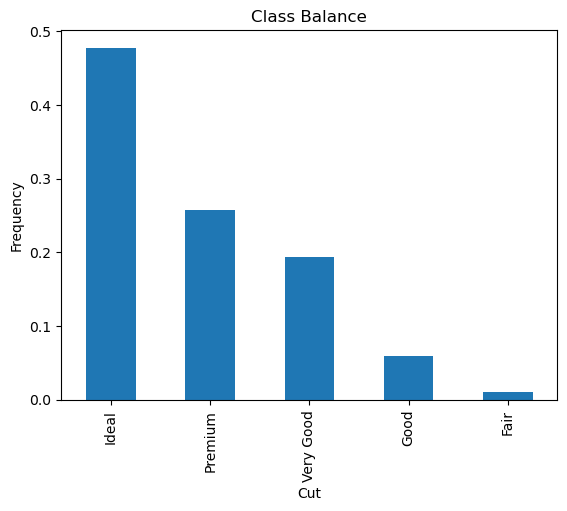

In [112]:
# Plot class balance
df["cut"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel = "Cut",
    ylabel = "Frequency",
    title = "Class Balance"
)

In [113]:
df["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

<Axes: title={'center': 'Class Balance'}, xlabel='Color', ylabel='Frequency'>

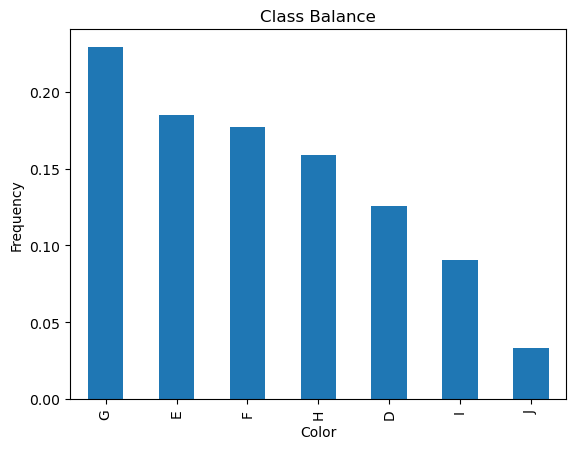

In [114]:
# Plot class balance
df["color"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel = "Color",
    ylabel = "Frequency",
    title = "Class Balance"
)

In [115]:
df.sample(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
166039,166039,1.01,Premium,H,SI1,62.5,58.0,6.27,6.24,3.90,4513
66369,66369,0.75,Very Good,F,SI2,60.8,60.0,5.88,5.91,3.58,2298
114926,114926,0.33,Ideal,F,VS2,61.9,56.0,4.40,4.43,2.73,666
164472,164472,0.30,Premium,I,SI1,61.3,61.0,4.33,4.29,2.64,393
16225,16225,0.76,Very Good,E,VS2,58.5,63.0,5.98,6.04,3.52,3238
130132,130132,1.08,Ideal,D,SI2,62.7,56.0,6.56,6.52,4.09,5364
76859,76859,0.39,Ideal,E,VVS1,59.8,57.0,4.76,4.80,2.86,1232
105978,105978,0.31,Ideal,D,SI1,62.1,54.0,4.35,4.38,2.71,591
191004,191004,0.56,Ideal,H,VVS2,62.0,55.0,5.31,5.30,3.28,1809
4083,4083,0.31,Ideal,D,VS2,61.4,56.0,4.34,4.37,2.68,504


In [116]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [117]:
df.size

2129303

In [118]:
df.shape

(193573, 11)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [120]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [121]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [122]:
df.drop(labels=["id"],axis=1,inplace=True)

In [123]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [124]:
df.duplicated().sum()

0

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [126]:
categ_col=df.columns[df.dtypes=="object"]
categ_col

Index(['cut', 'color', 'clarity'], dtype='object')

In [127]:
numer_col=df.columns[df.dtypes!="object"]
numer_col

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [128]:
df[numer_col].describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [129]:
df[numer_col].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [130]:
df[categ_col]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [131]:
for col in categ_col :
    print(df[col].value_counts())
    print(f"here is the total count:{len(df[col].value_counts())}")
    print("=======================")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
here is the total count:5
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
here is the total count:7
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
here is the total count:8


In [132]:
df[numer_col]

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


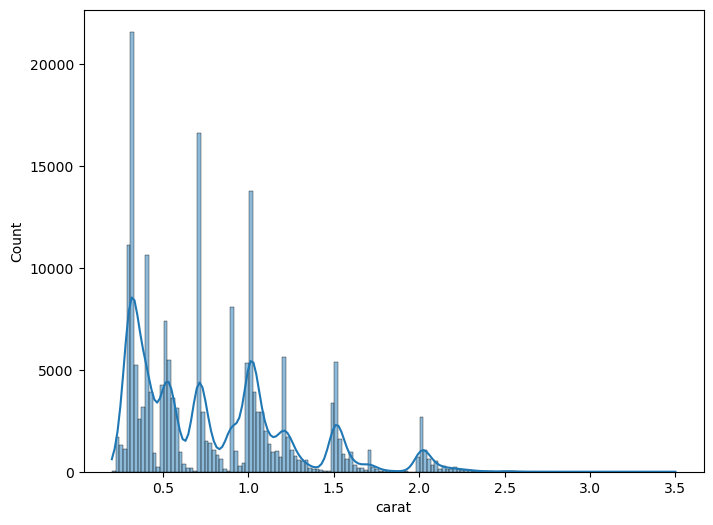

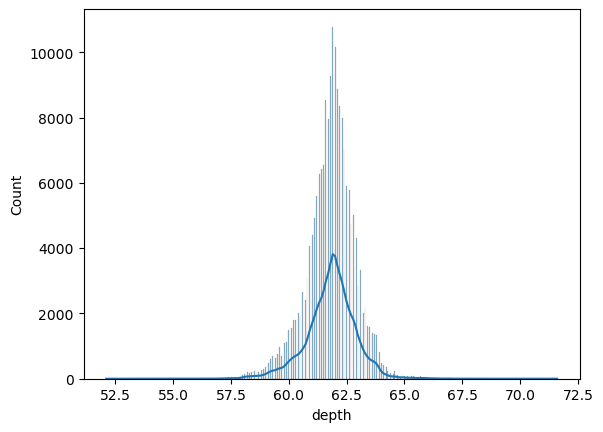

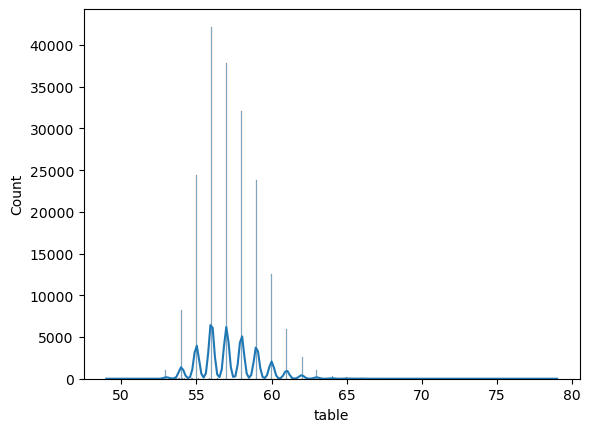

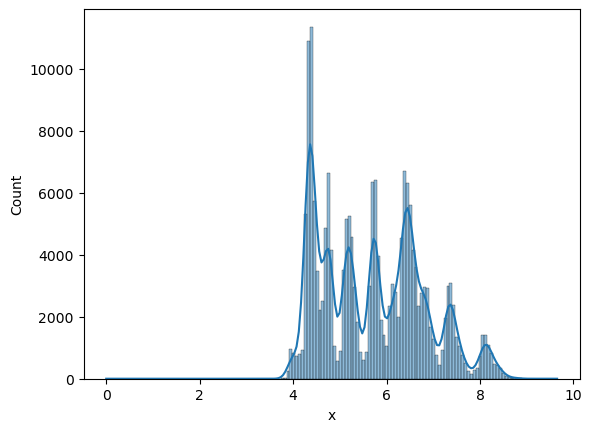

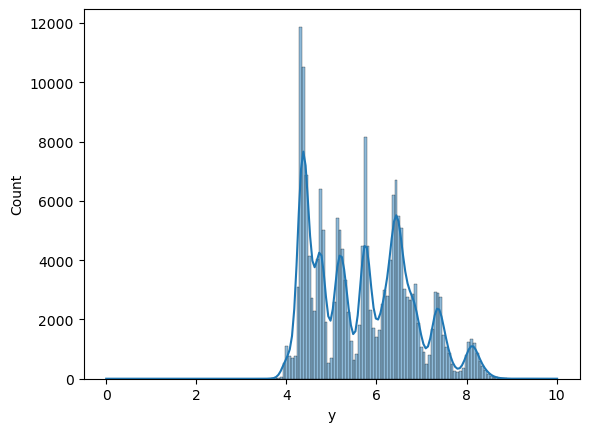

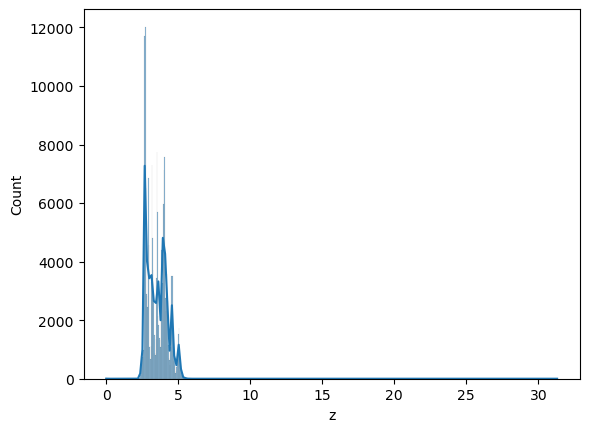

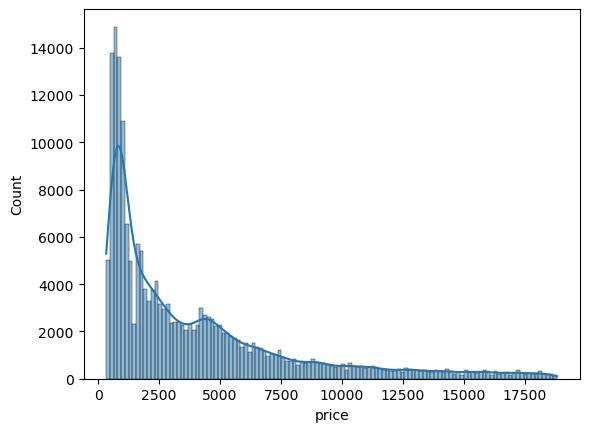

In [133]:
plt.figure(figsize=(8,6))
for col in numer_col:
    sns.histplot(data=df,x=col,kde=True)
    print("\n")
    plt.show()

In [134]:
corr = df[numer_col].corr()

<Axes: >

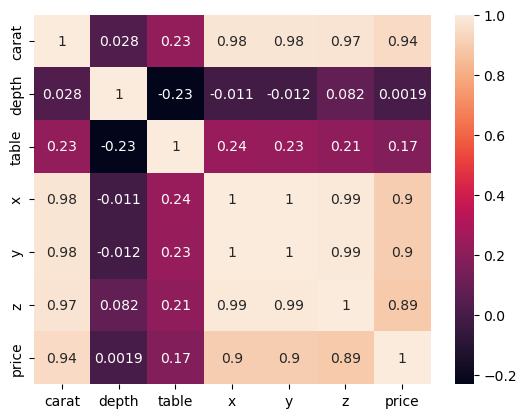

In [135]:
sns.heatmap(df[numer_col].corr(), annot=True)

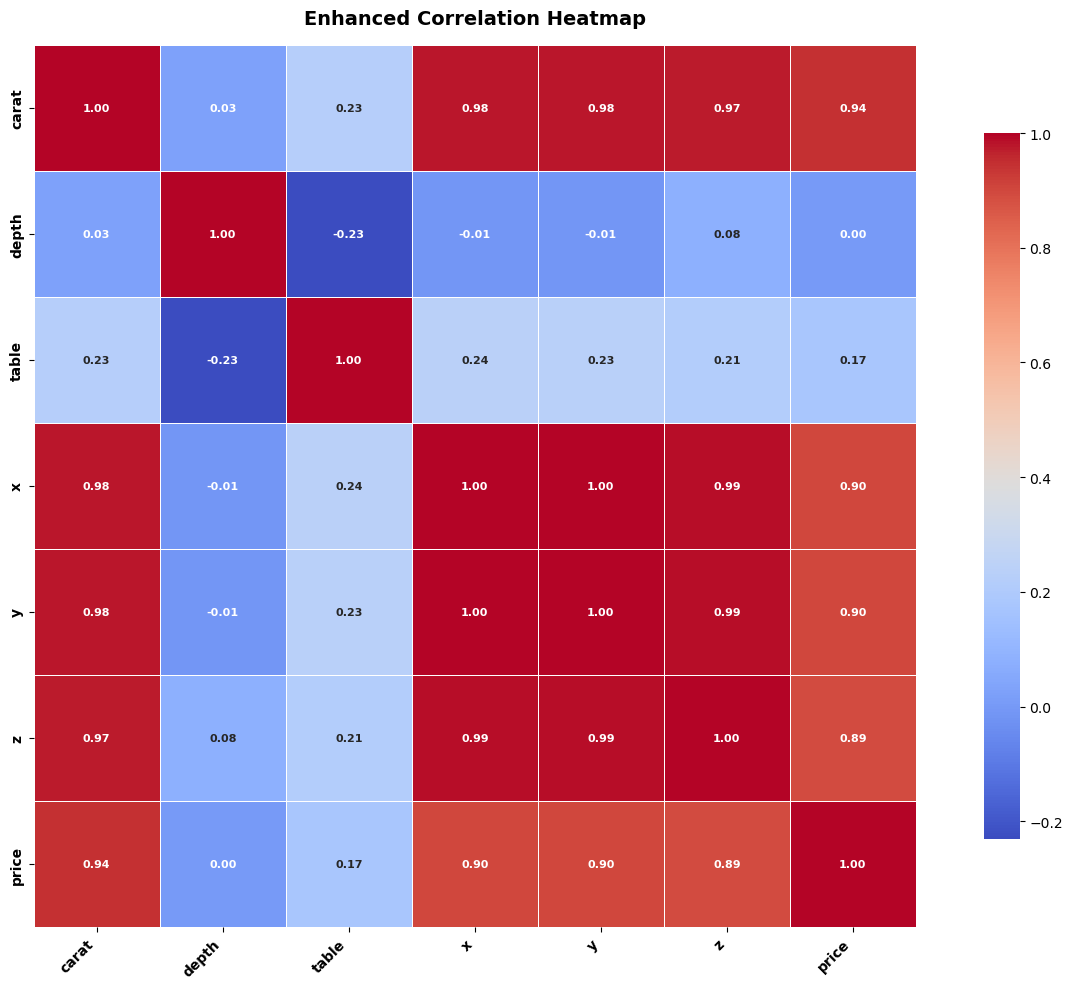

In [136]:
# Create the heatmap with enhancements
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 8, "weight": "bold"},
)
plt.title("Enhanced Correlation Heatmap", fontsize=14, fontweight="bold", pad=15)
plt.xticks(fontsize=10, rotation=45, ha="right", weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.tight_layout()
plt.show()

In [137]:
df[categ_col]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


In [138]:
for col in categ_col :
    print(df[col].value_counts())
    print(f"here is the total count:{len(df[col].value_counts())}")
    print("=======================")

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64
here is the total count:5
color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64
here is the total count:7
clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64
here is the total count:8


### **Data Selection and Preprocessing**

In [139]:
# Using oridinal encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [140]:
df["cut"]=df["cut"].map(cut_map)
df["clarity"]=df["clarity"].map(clarity_map)
df["color"]=df["color"].map(color_map)

In [141]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681


## **Another Way**

In [175]:
df=pd.read_csv("datasets/train.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [176]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [177]:
X=df.drop(labels=["price", "id"],axis=1)
y=df["price"]

In [178]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [179]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [180]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
dtypes: float64(6), object(3)
memory usage: 13.3+ MB


In [181]:
categ_cols=X.select_dtypes(include="object").columns

numer_cols=X.select_dtypes(exclude="object").columns

In [182]:
categ_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [183]:
numer_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [184]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [185]:
numer_pipeline=Pipeline(
    steps=[
        ("imputer",SimpleImputer()),  # Handling Missing Values
        ("scaler",StandardScaler())   # Handling Feature Scaling
    ]
)

In [186]:
categ_pipeline=Pipeline(

    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder",OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))   # Hadling  Ordinal Encoding

    ]
)

In [187]:
numer_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [188]:
categ_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [ ]:
preprocessor=ColumnTransformer(        # Compose Pipeline with column features
   
    [
        ("numer_pipeline",numer_pipeline,numer_cols),
        ("categ_pipeline",categ_pipeline,categ_cols)
    ]
)

In [190]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77
...,...,...,...,...,...,...,...,...,...
193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67
193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47
193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62
193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81


In [191]:
y

0         13619
1         13387
2          2772
3           666
4         14453
          ...  
193568     1130
193569     2874
193570     3036
193571      681
193572     2258
Name: price, Length: 193573, dtype: int64

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [193]:
X_test.shape

(38715, 9)

In [194]:
y_train.head()

83475      614
160324    7002
101740    9347
180341    8525
48480     5217
Name: price, dtype: int64

In [ ]:
preprocessor.fit_transform(X_train) 

array([[-1.01639515, -0.20431653,  0.4026079 , ...,  3.        ,
         1.        ,  2.        ],
       [ 0.88239567,  0.72075808, -0.1185356 , ...,  3.        ,
         2.        ,  3.        ],
       [ 1.52971072,  0.35072823, -1.16082259, ...,  4.        ,
         5.        ,  3.        ],
       ...,
       [ 0.92555001,  0.905773  ,  0.4026079 , ...,  3.        ,
         3.        ,  3.        ],
       [-1.03797232, -0.66685384, -0.63967909, ...,  2.        ,
         3.        ,  6.        ],
       [-1.03797232, -0.01930161,  0.9237514 , ...,  2.        ,
         3.        ,  1.        ]])

In [196]:
preprocessor.transform(X_test)

array([[-0.62800612,  0.25822077, -0.1185356 , ...,  4.        ,
         0.        ,  2.        ],
       [ 2.60856914, -2.14697321, -0.1185356 , ...,  2.        ,
         3.        ,  1.        ],
       [-1.124281  , -1.2218986 ,  0.9237514 , ...,  3.        ,
         1.        ,  6.        ],
       ...,
       [ 0.23508062,  0.53574316,  3.00832538, ...,  2.        ,
         2.        ,  2.        ],
       [-0.62800612,  0.16571331,  1.44489489, ...,  2.        ,
         2.        ,  2.        ],
       [-0.52012028, -1.49942098, -0.1185356 , ...,  2.        ,
         4.        ,  2.        ]])

In [197]:
preprocessor.get_feature_names_out()

array(['numer_pipeline__carat', 'numer_pipeline__depth',
       'numer_pipeline__table', 'numer_pipeline__x', 'numer_pipeline__y',
       'numer_pipeline__z', 'categ_pipeline__cut',
       'categ_pipeline__color', 'categ_pipeline__clarity'], dtype=object)

In [198]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [204]:
print(f"X_train Shape is {X_train.shape}")
print(f"y_train Shape is {y_train.shape}")

X_train Shape is (154858, 9)
y_train Shape is (154858,)


In [205]:
print(f"X_test Shape is {X_test.shape}")
print(f"y_test Shape is {y_test.shape}")

X_test Shape is (38715, 9)
y_test Shape is (38715,)


In [199]:
X_train

,numer_pipeline__carat,numer_pipeline__depth,numer_pipeline__table,numer_pipeline__x,numer_pipeline__y,numer_pipeline__z,categ_pipeline__cut,categ_pipeline__color,categ_pipeline__clarity
0,-1.016395,-0.204317,0.402608,-1.202472,-1.187395,-1.194148,3.0,1.0,2.0
1,0.882396,0.720758,-0.118536,0.985177,0.941823,1.036109,3.0,2.0,3.0
2,1.529711,0.350728,-1.160823,1.426308,1.394848,1.441611,4.0,5.0,3.0
3,1.896523,0.073206,0.923751,1.741402,1.711965,1.702290,3.0,5.0,1.0
4,0.450852,1.738340,1.444895,0.562052,0.525040,0.703019,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
154853,-0.628006,-1.499421,1.966038,-0.545277,-0.516918,-0.643825,2.0,1.0,2.0
154854,2.414375,0.443236,2.487182,1.921455,1.875054,1.934005,2.0,2.0,2.0
154855,0.925550,0.905773,0.402608,0.994180,0.923702,1.050591,3.0,3.0,3.0
154856,-1.037972,-0.666854,-0.639679,-1.211475,-1.196455,-1.252077,2.0,3.0,6.0


In [200]:
X_test

,numer_pipeline__carat,numer_pipeline__depth,numer_pipeline__table,numer_pipeline__x,numer_pipeline__y,numer_pipeline__z,categ_pipeline__cut,categ_pipeline__color,categ_pipeline__clarity
0,-0.628006,0.258221,-0.118536,-0.599293,-0.580341,-0.571414,4.0,0.0,2.0
1,2.608569,-2.146973,-0.118536,2.128516,2.201232,1.962969,2.0,3.0,1.0
2,-1.124281,-1.221899,0.923751,-1.373523,-1.413907,-1.469310,3.0,1.0,6.0
3,-1.016395,-0.574346,0.923751,-1.157458,-1.160213,-1.194148,3.0,5.0,6.0
4,0.860819,0.628251,-0.639679,0.949167,0.987125,1.007145,4.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...
38710,0.472429,1.553325,0.923751,0.607065,0.543161,0.731983,1.0,5.0,2.0
38711,-1.037972,-0.481839,-1.160823,-1.157458,-1.142092,-1.179666,4.0,0.0,3.0
38712,0.235081,0.535743,3.008325,0.336985,0.371011,0.398893,2.0,2.0,2.0
38713,-0.628006,0.165713,1.444895,-0.536274,-0.580341,-0.542449,2.0,2.0,2.0


### **Model Building & Training**

In [211]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'RandomForest':RandomForestRegressor(),
    'XGboost':XGBRegressor()

}

In [212]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [213]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'RandomForest', 'XGboost']

In [215]:
len(list(models))

6

In [216]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)
    

LinearRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


In [217]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'ElasticNet', 'RandomForest', 'XGboost'])

In [218]:
list(models.values())[1]

Lasso()

In [220]:
def evaluate_model(true,pred):
    R2 = r2_score(true,pred)
    MAE = mean_absolute_error(true,pred)
    MSE = mean_squared_error(true,pred)

    return MAE, MSE,R2

In [228]:
results = []       # empty list to store results
r2_list = []       # store only R2 values

for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    
    model.fit(X_train, y_train)

    # Make prediction
    y_pred = model.predict(X_test)

    # Validation
    MAE, MSE, R2 = evaluate_model(y_test, y_pred)

    # Save results in dictionary
    results.append({
        "Model": model_name,
        "MSE": MSE,
        "MAE": MAE,
        "R2": R2
    })

    # Append only R2
    r2_list.append(R2)

    # Print performance with separator
    print("Model training performance:", model_name)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("R2 SCORE:", R2)
    print("="*40)
    print("\n")

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df


LinearRegression()

Model training performance: LinearRegression
MSE: 1013245.5452810968
MAE: 671.5856392794326
R2 SCORE: 0.9372975155452951




Lasso()

Model training performance: Lasso
MSE: 1013790.3860145371
MAE: 672.9964160404007
R2 SCORE: 0.9372637992681518




Ridge()

Model training performance: Ridge
MSE: 1013256.1246827833
MAE: 671.614563635068
R2 SCORE: 0.9372968608621604




ElasticNet()

Model training performance: ElasticNet
MSE: 2298790.237391505
MAE: 1053.4176488002738
R2 SCORE: 0.8577443939467991




RandomForestRegressor()

Model training performance: RandomForest
MSE: 368308.3845764118
MAE: 309.21885417553517
R2 SCORE: 0.9772080411643623




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Model training performance: XGboost
MSE: 342736.69132723036
MAE: 296.9581576596023
R2 SCORE: 0.9787904620170593




,Model,MSE,MAE,R2
0,LinearRegression,1.013246e+06,671.585639,0.937298
1,Lasso,1.013790e+06,672.996416,0.937264
2,Ridge,1.013256e+06,671.614564,0.937297
3,ElasticNet,2.298790e+06,1053.417649,0.857744
4,RandomForest,3.683084e+05,309.218854,0.977208
5,XGboost,3.427367e+05,296.958158,0.978790


In [229]:
r2_list

[0.9372975155452951,
 0.9372637992681518,
 0.9372968608621604,
 0.8577443939467991,
 0.9772080411643623,
 0.9787904620170593]

In [230]:
max(r2_list)

0.9787904620170593

In [231]:
LOG_FILE=f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"

log_path=os.path.join(os.getcwd(),"logs")

os.makedirs(log_path,exist_ok=True)

LOG_FILEPATH=os.path.join(log_path,LOG_FILE)


In [232]:
LOG_FILEPATH

'c:\\Users\\USER\\Documents\\End\\experiment\\logs\\08_18_2025_16_23_47.log'

In [233]:
logging.basicConfig(level=logging.INFO, 
                    filename=LOG_FILEPATH,
                    format="[%(asctime)s] %(lineno)d %(name)s - %(levelname)s - %(message)s"
                    
)


In [234]:
logging.info("This is my test log")